In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
%matplotlib inline

In [3]:
a0 = 0.529177249 #Angstroms
Z = 1.

In [4]:
Y= lambda l, m, theta, phi: special.sph_harm(m, l, phi, theta)
L = lambda p, q, x: special.genlaguerre(p, q, monic = False)(x)

In [5]:
def Psi(n, l, m, r, theta, fi):
    """
    n = 1, 2, 3, ...
    l = 0, 1, 2, ..., n - 1
    m = -l ,-l + 1, ..., l - 1, l
    """
    cn = np.sqrt((2*Z/(n*a0))**3*np.math.factorial(n - l - 1)/(2*n*np.math.factorial(n + l)))
    rho = 2*Z/(n*a0)*r
    
    return cn*np.exp(-rho/2)*rho**l*L(n - l - 1, 2*l + 1, rho)*Y(l, m, theta, fi)

In [6]:
def my_orbital(n, l, m, scale):
   
    z, x = np.meshgrid(np.linspace(-scale, scale, 1000), np.linspace(-scale, scale, 1000))
    
    r = np.sqrt(x**2 + z**2)
    theta = np.arccos(z/r)
     
    I = np.abs(Psi(n, l, m, r, theta, 0.))**2; I = I[:-1, :-1]

    fig = plt.figure(figsize = (10, 8))

    c = plt.pcolormesh(x, z, I, cmap='inferno', vmin= I.min(), vmax=I.max())
    plt.xlabel("$x$", fontsize = 12)
    plt.ylabel("$z$", fontsize = 12)
    
    plt.title(f"orbital({n}, {l}, {m})")

    fig.colorbar(c)
    plt.show()

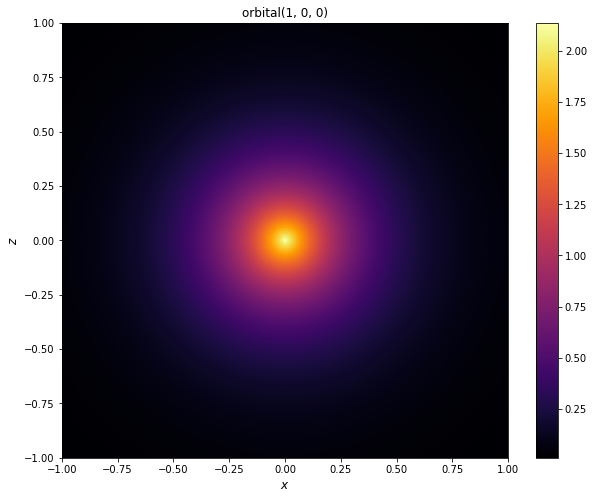

In [14]:
my_orbital(1, 0, 0, 1)